# Práctica 1

Julián Cámara Miró

### Parte guiada

In [1]:
import numpy as np
from qiskit import(
QuantumCircuit,
execute,
Aer)
from qiskit.visualization import plot_histogram
# Usamos el qasm_simulator de Aer
simulator = Aer.get_backend('qasm_simulator')
# Creamos un objeto Quantum Circuit que actúa sobre el registro cuántico
# de un bit (primer parámetro) y que tiene un registro clásico de un bit(segundo parámetro)
circuit = QuantumCircuit(1, 1)
# Añadimos una puerta Hadamard con el qubit q_0 como entrada
circuit.h(0)
# Mapeamos la medida de los qubits (primer parámetro) sobre los bits clásicos
circuit.measure([0], [0])
# Ejecutamos el circuito sobre el simulador qasm
job = execute(circuit, simulator, shots=1000)
# Almacenamos los resultados
result = job.result()
# Capturamos las ocurrencias de salida
counts = result.get_counts(circuit)
# Escribimos el número de ocurrencias
print("\nNúmero de ocurrencias para 0 y 1:",counts)
circuit.draw()


Número de ocurrencias para 0 y 1: {'1': 482, '0': 518}


┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

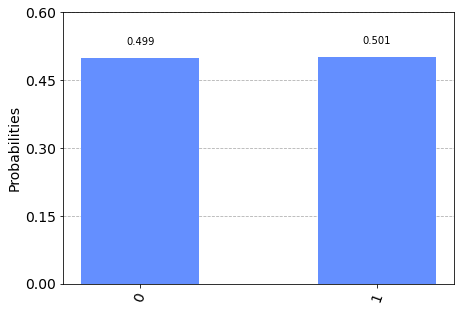

In [4]:
plot_histogram(counts)

### Ejercicio 1

In [5]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [8]:
circuit = QuantumCircuit(2,2)

circuit.h(0)  # Aplicamos puerta Hadamard sobre el qubit 0.
circuit.cnot(0 , 1)   # Aplicamos puerta CNOT, con el bit 0 de control y la salida en el bit 1.
circuit.measure([0, 1], [0, 1])  # Medimos los dos qubits.ç

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

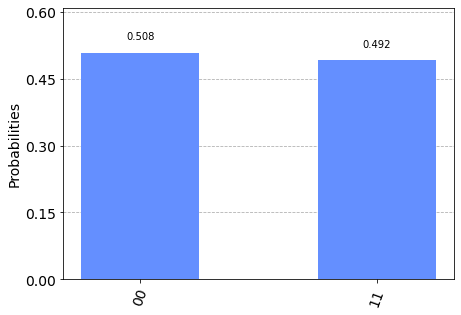

In [10]:
simulator = Aer.get_backend('qasm_simulator')

job = execute(circuit, simulator, shots=1000)

counts = job.result().get_counts(circuit)

plot_histogram(counts)


Se observa que las salidas son siempre 00 o 11. Esto se debe a que todavia no hemos introducido ruido en la simulación.

In [35]:
# Con el simulador unitario.

simulator = Aer.get_backend('unitary_simulator')

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cnot(0,1) 

# circuit.measure([0, 1], [0, 1])  # Medimos los dos qubits.

job = execute(circuit, simulator)

resul = job.result().get_unitary().data
resul = np.real(resul) # Quitamos la parte imaginaria, ya que en este caso es todo ceros.
resul = np.round(resul, 3)

print(resul)
circuit.draw()

# Resultado esperado:

# (1 0 0 0)   (                 )
# (0 0 0 1) * ( (1  0) ⊗ (1  1) )
# (0 0 1 0)   ( (0  1)   (1 -1) )
# (0 1 0 0)   (                 )


[[ 0.707  0.707  0.     0.   ]
 [ 0.     0.     0.707 -0.707]
 [ 0.     0.     0.707  0.707]
 [ 0.707 -0.707  0.     0.   ]]


┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

En este apartado se ua usado el simulador unitario, el cual calcula la matriz equivalente a la combinación  de las puertas del circuito. Por este motivo, no se pueden utilizar bits clásicos para medir.

El resultado que se obtiene es el esperado para el circuito dibujado: CNOT * (I ⊗ H).

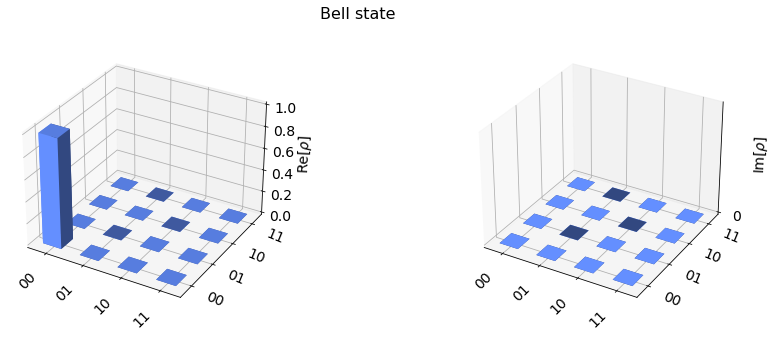

In [40]:
# Con statevector_simulator.

from qiskit.tools.visualization import plot_state_city

simulator = Aer.get_backend('statevector_simulator')
circuit = QuantumCircuit(2,2)

circuit.h(0)  # Aplicamos puerta Hadamard sobre el qubit 0.
circuit.cnot(0 , 1)   # Aplicamos puerta CNOT, con el bit 0 de control y la salida en el bit 1.
circuit.measure([0, 1], [0, 1])  # Medimos los dos qubits.

# Execute and get counts
result = execute(circuit, simulator).result()
statevector = result.get_statevector(circuit)
plot_state_city(statevector, title='Bell state')


En este caso, el simulador es parecido al qasm_simulator, pero solo realiza una simulación por ejecución.

En las gráficas generadas vemos que el resultado solo toma los valores 00 o 11, dependiendo de cada ejecución.

Además, el statevector_simulator no soporta simulaciones de ruido.

### Ejercicio 2

In [2]:
# Definimos el nuevo circuito, añadiendo otro qubit y otra puerta cnot.

circuit = QuantumCircuit(3,3)

circuit.h(0)  # Aplicamos puerta Hadamard sobre el qubit 0.
circuit.cnot(0 , 1)   # Aplicamos puerta CNOT, con el bit 0 de control y la salida en el bit 1.
circuit.cnot(1 , 2)   # Aplicamos puerta CNOT, con el bit 0 de control y la salida en el bit 1.
circuit.measure([0, 1, 2], [0, 1, 2])  # Medimos los dos qubits.

circuit.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

In [3]:
from qiskit import IBMQ
provider = IBMQ.load_account()

# Vamos a usar el ibmq_belem.
backend = provider.get_backend("ibmq_belem")

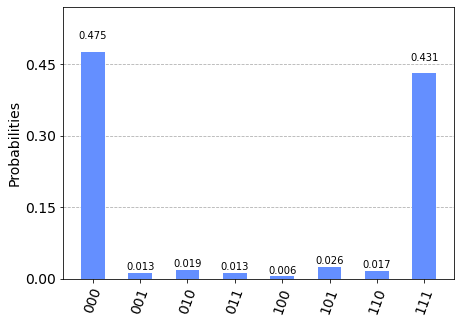

In [26]:
from qiskit.providers.aer.noise import NoiseModel


# Nos descargamos el modelo de ruido del backend real.
noise_model = NoiseModel.from_backend(backend)

simulator = Aer.get_backend('qasm_simulator')

# Ejectuamos la simulación con ruido
job = execute(circuit, simulator, shots=1000, noise_model=noise_model)
counts = job.result().get_counts(circuit)

plot_histogram(counts)

Al introducir ruido, las salidas ya no toman siempre los resultados esperados, sino que ahora aparecen valores arbitrarios que no se corresponden al problema. Aun así, como estos resultados aparecen de forma minoritaria, y se ha lanzado el programa 4000 veces, los resultados correctos se distinguen facilmente del ruido.

In [4]:
from qiskit import transpile

# Transpilamos el circuito para poder usarlo en el computador real.
transpiled = transpile(circuit, backend=backend)
transpiled.draw()

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐          ┌─┐      
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───────┤M├──────
               └─────────┘└────┘└─────────┘┌─┴─┐     └╥┘┌─┐   
      q_1 -> 1 ────────────────────────────┤ X ├──■───╫─┤M├───
                                           └───┘┌─┴─┐ ║ └╥┘┌─┐
      q_2 -> 2 ─────────────────────────────────┤ X ├─╫──╫─┤M├
                                                └───┘ ║  ║ └╥┘
ancilla_0 -> 3 ───────────────────────────────────────╫──╫──╫─
                                                      ║  ║  ║ 
ancilla_1 -> 4 ───────────────────────────────────────╫──╫──╫─
                                                      ║  ║  ║ 
          c: 3/═══════════════════════════════════════╩══╩══╩═
                                                      0  1  2

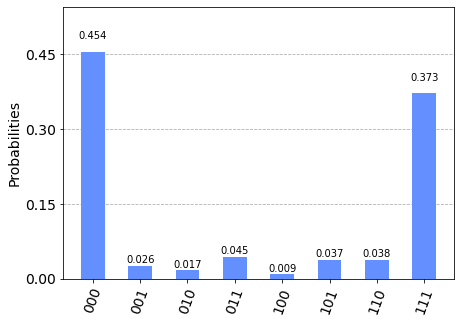

In [11]:
# Probamos ahora en un computador cuantico real.

job = backend.run(transpiled)
retrieved_job = backend.retrieve_job(job.job_id())

counts = retrieved_job.result().get_counts(circuit)
plot_histogram(counts)

Se observa que los resultados del simulador y del computador real son bastante parecidos. Parece apreciarse un ruido mayor en el imbq_belem que en el simulador, a pesar de haber utilizado el modelo de ruido de este mismo computador.

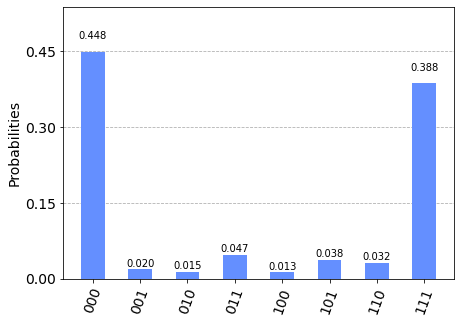

In [20]:
# Se realiza una segunda ejecución del mismo circuito.

job = backend.run(transpiled)
retrieved_job = backend.retrieve_job(job.job_id())

counts = retrieved_job.result().get_counts(circuit)
plot_histogram(counts)

En una segunda ejecución, el ruido en el computador vuelve a ser más elevado que el ruido promedio que suele haber en el simulador. Sin embargo, el ruido no es suficiente como para dificultar la visualización de los resulados.

### Ejercicio 3

Se va a ejecutar el código del ejercicio 2 sobre otros 3 computadores de IBM.

In [2]:
from qiskit import transpile, QuantumCircuit
from qiskit.visualization import plot_histogram

circuit = QuantumCircuit(3,3)

circuit.h(0)  # Aplicamos puerta Hadamard sobre el qubit 0.
circuit.cnot(0 , 1)   # Aplicamos puerta CNOT, con el bit 0 de control y la salida en el bit 1.
circuit.cnot(1 , 2)   # Aplicamos puerta CNOT, con el bit 0 de control y la salida en el bit 1.
circuit.measure([0, 1, 2], [0, 1, 2])  # Medimos los dos qubits

circuit.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

In [17]:
# Mostramos la lista de backend reales disponibles
provider.backends(filters= lambda x: not x.configuration().simulator)

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

Vamos a probar el código del apartado 2, por ejemplo, en el ibmq_lima, ibmq_bogota y en el ibmq_manila.

De la lista de backends, el único que no nos sirve es el *ibmq_armonk*, ya que este solo tiene un qbit, y el circuito que queremos usar necesita tres como mínimo.

#### ibmq_lima

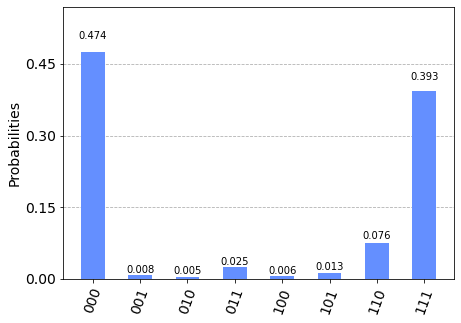

In [6]:
# ibmq_lima
backend = provider.get_backend("ibmq_lima")
transpiled = transpile(circuit, backend=backend)

job = backend.run(transpiled)
retrieved_job = backend.retrieve_job(job.job_id())

counts = retrieved_job.result().get_counts(circuit)
plot_histogram(counts)

#### ibmq_bogota

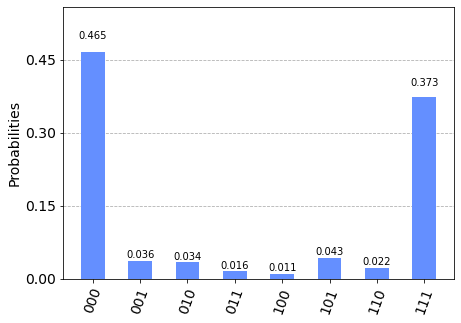

In [8]:
# ibmq_bogota
backend = provider.get_backend("ibmq_bogota")
transpiled = transpile(circuit, backend=backend)

job = backend.run(transpiled)
retrieved_job = backend.retrieve_job(job.job_id())

counts = retrieved_job.result().get_counts(circuit)
plot_histogram(counts)

#### ibmq_manila

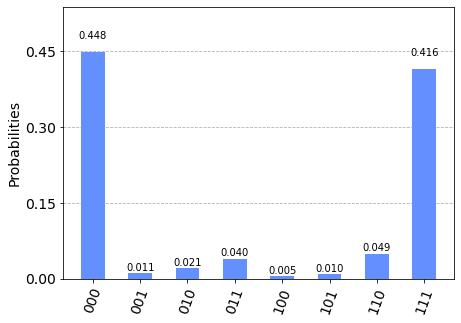

In [4]:
# ibmq_manila
backend = provider.get_backend("ibmq_manila")
transpiled = transpile(circuit, backend=backend)

job = backend.run(transpiled)
retrieved_job = backend.retrieve_job(job.job_id())

counts = retrieved_job.result().get_counts(circuit)
plot_histogram(counts)

#### Conclusiones

En cada computador se han realizado 4000 ejecuciones (shots). 

Observamos que los resultados son los esperados en los nuevos computadores. Los tres presentan niveles de ruido aceptables y es fácil distinguir los resultados reales. Es dificil determinar cual de los tres presenta un menor ruido, pero observamos que en este caso, el ibmq_manila es el único que ha tenido por encima de 0.4 en la configuracion *111*. 

Resulta curioso que parece tener siempre menos ocurrencias la configuración *111* que la *000*.

### Ejercicio 4

In [5]:
# Cremos la tarea y la dejamos en la cola de ejecución del computador de ionq
import boto3
from braket.circuits import Circuit
from braket.aws import AwsDevice


device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
s3_folder = ("amazon-braket-f085dc433a90", "apcc2022/JulianCamara/IONQ")
hadam = Circuit().h(0).cnot(0, 1).cnot(1, 2)
print(hadam)
task = device.run(hadam, s3_folder)
print("Task:",task.id)
print("Status:", task.state())


T  : |0|1|2|
            
q0 : -H-C---
        |   
q1 : ---X-C-
          | 
q2 : -----X-

T  : |0|1|2|
Task: arn:aws:braket:us-east-1:975085098040:quantum-task/5cb71284-9e38-4e96-a984-21a3cfe46381
Status: CREATED


Counter({'000': 478, '111': 476, '100': 11, '110': 11, '011': 10, '101': 7, '001': 4, '010': 3})


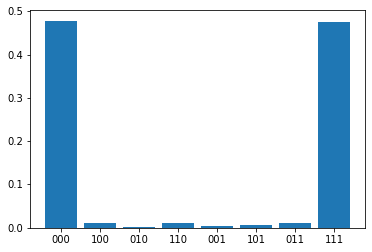

In [17]:
# Se recogen los resultados

from braket.aws import AwsQuantumTask
from matplotlib import pyplot as plt

# restore task with unique arn
task = AwsQuantumTask(arn="arn:aws:braket:us-east-1:975085098040:quantum-task/5cb71284-9e38-4e96-a984-21a3cfe46381")
# retrieve the result of the task
estado = task.state()

if task.state() == "QUEUED":
    print("En cola")
else:
    results = task.result().measurement_counts
    print(results)
    plt.bar(results.keys(), [x / 1000 for x in results.values()])


En este caso vemos niveles de ruido aparentemente incluso más bajos que en el caso de los computadores de IBM.